In [1]:
"""IBMQトークンの読み込み"""
TOKEN_FILE = "token.txt"
with open(TOKEN_FILE, mode="r", encoding="ascii") as f:
    token = f.readline()

In [2]:
"""その他の準備"""
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

In [3]:
"""qiskitの準備"""
from qiskit import IBMQ

# トークンを使ってIBMQに接続する
# IBMQ.enable_account(token)
IBMQ.save_account(token)
IBMQ.load_account()

# IBMQプロバイダ（実機へのアクセスを管理するオブジェクト）
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

# バックエンド（実機）のうち量子ビット数2個以上のもののリストをプロバイダから取得し、一番空いているものを選ぶ
backend_filter = lambda b: (not b.configuration().simulator) and (b.configuration().n_qubits >= 2) and b.status().operational
backend = least_busy(provider.backends(filters=backend_filter))

print('Jobs will run on', backend.name())

configrc.store_credentials:WARNING:2021-05-06 03:51:39,374: Credentials already present. Set overwrite=True to overwrite.
Jobs will run on ibmq_quito


In [4]:
"""量子回路の作成
2量子ビットを操作する
"""
theta1 = 2. * np.arctan(np.sqrt(7. / 3.))
theta2 = 2. * np.arctan(np.sqrt(2.))
theta3 = 2. * np.arctan(np.sqrt(4. / 3))

circuit = QuantumCircuit(2)
circuit.ry(theta1, 1)
circuit.ry(theta2, 0)
circuit.cry(theta3 - theta2, 1, 0) # C[Ry]　1が制御で0が標的
circuit.cz(0, 1) # C[Z] 0が制御で1が標的（実はC[Z]ではどちらが制御でも結果は同じ）
circuit.measure_all()

print('This circuit has', circuit.num_qubits, 'qubits and', circuit.size(), 'operations')

This circuit has 2 qubits and 6 operations


In [5]:
"""量子コンピューティングにジョブを投げる
IBMQにジョブを投げるので、不用意に何回も実行しないこと
"""
shots = 8192
job = execute(circuit, backend=backend, shots=shots)
job_monitor(job, interval=2)

Job Status: job has successfully run


In [6]:
"""量子測定結果の解析
ジョブの結果を表示する
"""
result = job.result()

counts = []
c = result.get_counts(circuit)
counts.append(c)
print(counts)

[{'00': 1321, '01': 1774, '10': 2350, '11': 2747}]


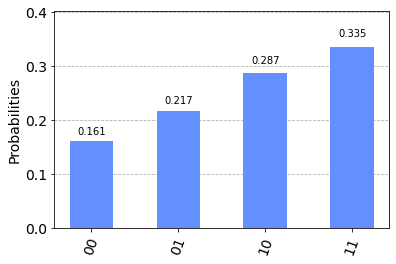

In [7]:
"""実行結果の可視化"""
for c in counts:
    ax = plt.figure().add_subplot()
    plot_histogram(c, ax=ax)